In [5]:
import pandas as pd

# Define la ruta del archivo CSV
file_path = r'D:\master\14MBID2024\owid-covid-data.csv'

# Cargar el dataset en un DataFrame de pandas, asegurándote de parsear las fechas
df = pd.read_csv(file_path, parse_dates=['date'])

# Filtrar datos para Colombia
df_colombia = df[df['location'] == 'Colombia']

# Seleccionar columnas específicas para análisis y hacer una copia profunda para evitar advertencias
selected_columns = df_colombia[['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths']].copy(deep=True)

# Aplicar imputación con cero directamente sin usar 'inplace=True'
selected_columns['total_cases'] = selected_columns['total_cases'].fillna(0)
selected_columns['total_deaths'] = selected_columns['total_deaths'].fillna(0)

# Revisar las primeras filas después de la imputación
print(selected_columns.head())

# Guardar el DataFrame filtrado como CSV
#selected_columns.to_csv(r'D:\master\14MBID2024\owid-covid-data-colombia.csv', index=False)

# Calcular la matriz de correlación
correlation_matrix = selected_columns.corr()

# Guardar la matriz de correlación como CSV
#correlation_matrix.to_csv(r'D:\master\14MBID2024\correlation_matrix_colombia.csv')


            date  total_cases  new_cases  total_deaths  new_deaths
72544 2020-01-05          0.0        0.0           0.0         0.0
72545 2020-01-06          0.0        0.0           0.0         0.0
72546 2020-01-07          0.0        0.0           0.0         0.0
72547 2020-01-08          0.0        0.0           0.0         0.0
72548 2020-01-09          0.0        0.0           0.0         0.0


### Paso 3: Análisis Exploratorio de Datos (EDA)
Continúa con el EDA, concentrándote en visualizar y entender las tendencias y patrones de los casos y muertes en Colombia.


                                date   total_cases      new_cases  \
count                           1611  1.611000e+03    1611.000000   
mean   2022-03-20 00:00:00.000000256  4.380728e+06    3963.964618   
min              2020-01-05 00:00:00  0.000000e+00       0.000000   
25%              2021-02-10 12:00:00  2.142660e+06       0.000000   
50%              2022-03-20 00:00:00  6.079896e+06       0.000000   
75%              2023-04-26 12:00:00  6.364014e+06       0.000000   
max              2024-06-02 00:00:00  6.385947e+06  210161.000000   
std                              NaN  2.454629e+06   19930.796391   

        total_deaths   new_deaths  
count    1611.000000  1611.000000  
mean   102022.260708    88.595282  
min         0.000000     0.000000  
25%     55403.000000     0.000000  
50%    139415.000000     0.000000  
75%    142706.000000     0.000000  
max    142727.000000  4575.000000  
std     54237.737162   439.060414  
date            0
total_cases     0
new_cases       0


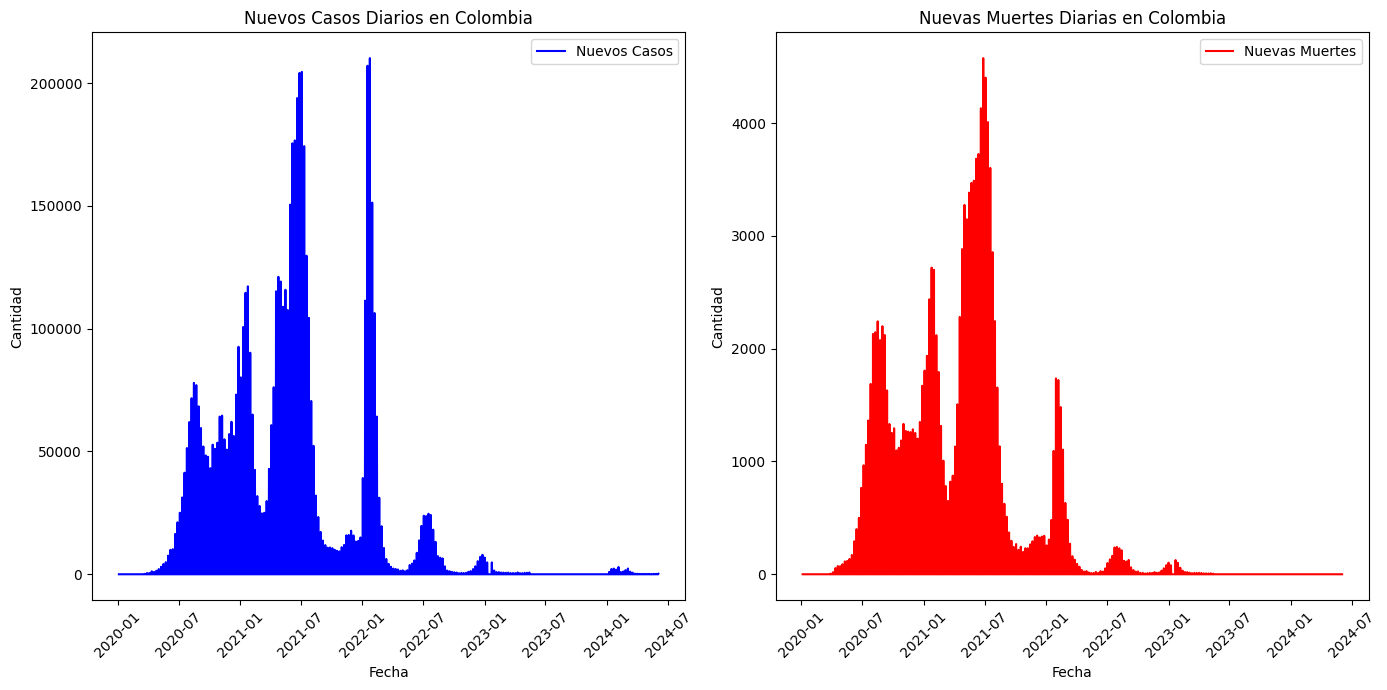

In [54]:
# Estadísticas descriptivas
print(selected_columns.describe())

# Comprobar valores faltantes
print(selected_columns.isnull().sum())

# Visualización de nuevos casos y nuevas muertes
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Gráfico de nuevos casos
plt.subplot(1, 2, 1)
plt.plot(selected_columns['date'], selected_columns['new_cases'].fillna(0), label='Nuevos Casos', color='blue')  # Uso de fillna para asegurar no NaNs
plt.title('Nuevos Casos Diarios en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()

# Gráfico de nuevas muertes
plt.subplot(1, 2, 2)
plt.plot(selected_columns['date'], selected_columns['new_deaths'].fillna(0), label='Nuevas Muertes', color='red')  # Uso de fillna para asegurar no NaNs
plt.title('Nuevas Muertes Diarias en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Análisis de los Datos Faltantes
total_cases y total_deaths: Estas columnas tienen 63 y 84 valores faltantes respectivamente. Esto podría impactar análisis que dependan de estas variables.
new_cases y new_deaths: No tienen valores faltantes, lo cual es positivo para análisis que se enfoquen en el conteo diario de casos y muertes.
Consideraciones Estadísticas
La gran desviación estándar (std) en comparación con la media (mean) en new_cases y new_deaths sugiere una alta variabilidad en los datos diarios, lo cual es común en datos de enfermedades debido a reportes acumulativos o correcciones en los datos.
La presencia de muchos ceros (como indicado por los percentiles 25%, 50% y 75% que son 0 en new_cases y new_deaths) podría indicar días sin reportes o con bajos números, lo que podría ser típico o podría reflejar inconsistencias en la recolección de datos.
Estrategias para Proceder
Manejo de Valores Faltantes:

Para total_cases y total_deaths, considera métodos de imputación como llevar el último valor observado hacia adelante o usar una interpolación simple. Esto es particularmente útil si los valores faltantes son aleatorios o si la serie temporal no debe tener huecos para el análisis.

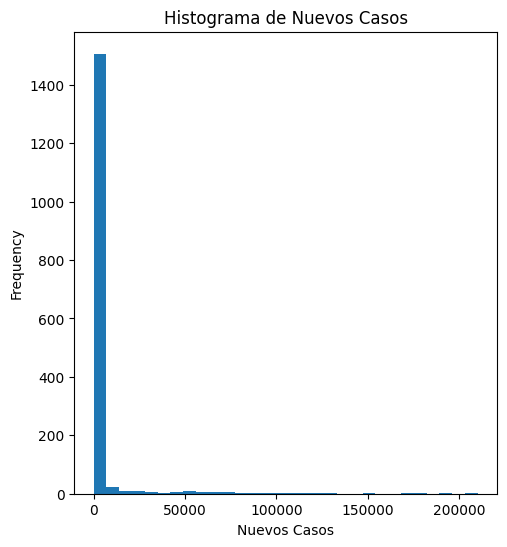

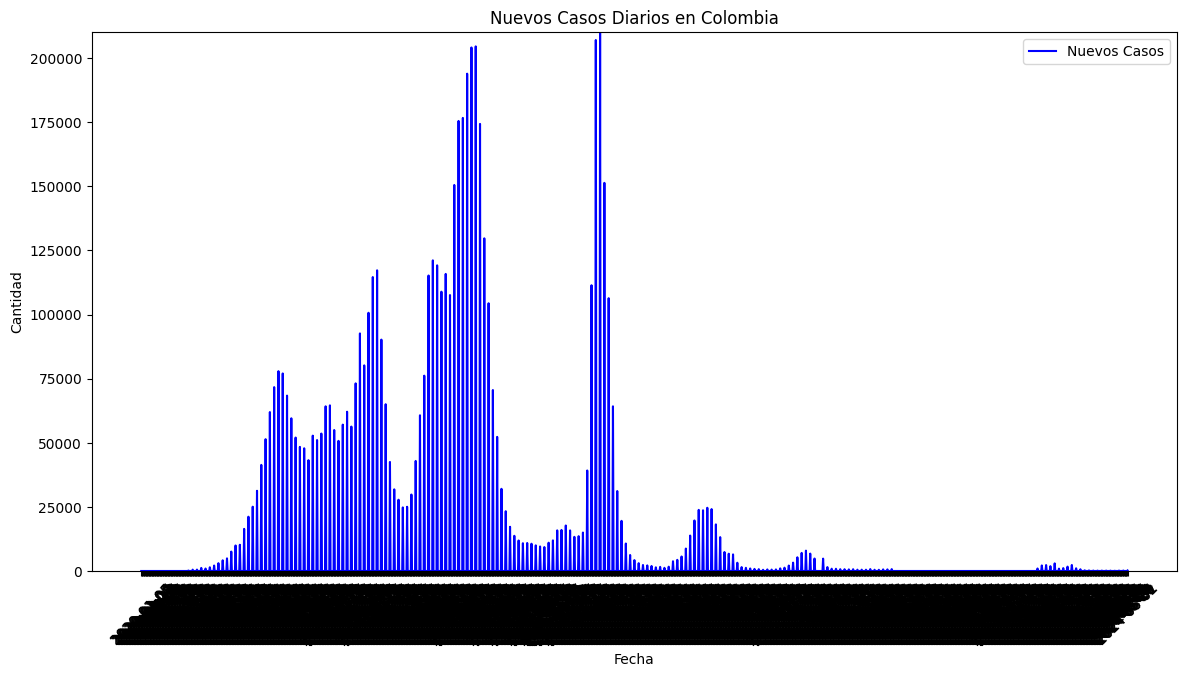

In [42]:
import matplotlib.pyplot as plt

# Histograma de nuevos casos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
selected_columns['new_cases'].plot(kind='hist', title='Histograma de Nuevos Casos', bins=30)
plt.xlabel('Nuevos Casos')

# Gráfico de línea de nuevos casos
plt.figure(figsize=(14, 7))
plt.plot(selected_columns['date'], selected_columns['new_cases'], label='Nuevos Casos', color='blue')
plt.ylim(0, selected_columns['new_cases'].max() + 10)  # Ajusta el límite superior para incluir todos los datos
plt.title('Nuevos Casos Diarios en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.show()



### Análisis de Correlación
Podemos comenzar investigando si hay alguna correlación entre las nuevas muertes y nuevos casos, lo que puede darnos una idea sobre cómo la tasa de infección se relaciona con la mortalidad.


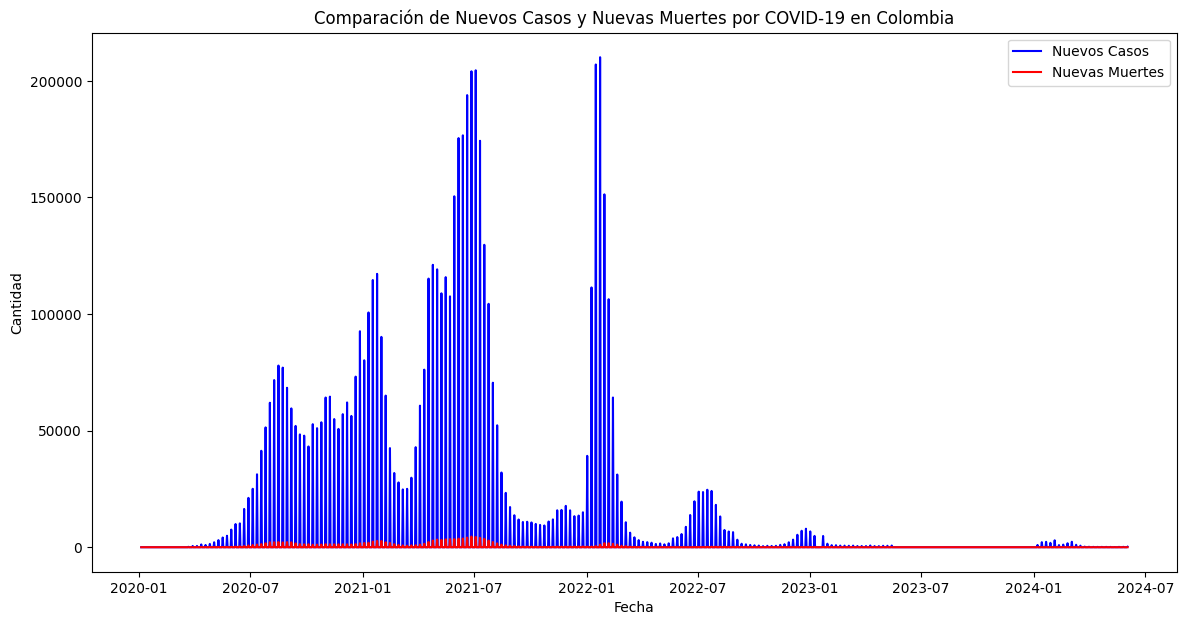

In [55]:
import matplotlib.pyplot as plt

# Configuración del gráfico
plt.figure(figsize=(14, 7))

# Gráfico para nuevos casos
plt.plot(selected_columns['date'], selected_columns['new_cases'], label='Nuevos Casos', color='blue')

# Gráfico para nuevas muertes
plt.plot(selected_columns['date'], selected_columns['new_deaths'], label='Nuevas Muertes', color='red')

# Título y etiquetas
plt.title('Comparación de Nuevos Casos y Nuevas Muertes por COVID-19 en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()

# Mostrar el gráfico
plt.show()


Calcular la Matriz de Correlación
Primero, necesitamos calcular la matriz de correlación de tu conjunto de datos. Este es un paso crucial, ya que define qué tan fuertemente cada par de variables en tu conjunto de datos están relacionadas entre sí.

In [56]:
# Calcular la matriz de correlación
correlation_matrix = selected_columns[['total_cases', 'new_cases', 'total_deaths', 'new_deaths']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


              total_cases  new_cases  total_deaths  new_deaths
total_cases      1.000000  -0.092077      0.995713   -0.125208
new_cases       -0.092077   1.000000     -0.077304    0.919093
total_deaths     0.995713  -0.077304      1.000000   -0.109920
new_deaths      -0.125208   0.919093     -0.109920    1.000000


In [3]:
import pandas as pd

# Crear la matriz de correlación
data = {
    'total_cases': [1.000000, -0.092077, 0.995713, -0.125208],
    'new_cases': [-0.092077, 1.000000, -0.077304, 0.919093],
    'total_deaths': [0.995713, -0.077304, 1.000000, -0.109920],
    'new_deaths': [-0.125208, 0.919093, -0.109920, 1.000000]
}
index = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']
correlation_matrix = pd.DataFrame(data, index=index)

# Convertir la matriz a formato largo
correlation_matrix_long = correlation_matrix.reset_index().melt(id_vars='index', var_name='variable', value_name='correlation')
correlation_matrix_long.rename(columns={'index': 'variable_1'}, inplace=True)

# Guardar el DataFrame largo
correlation_matrix_long.to_csv('correlation_matrix_long.csv', index=False)

# Mostrar las primeras filas del DataFrame largo
print(correlation_matrix_long)



      variable_1      variable  correlation
0    total_cases   total_cases     1.000000
1      new_cases   total_cases    -0.092077
2   total_deaths   total_cases     0.995713
3     new_deaths   total_cases    -0.125208
4    total_cases     new_cases    -0.092077
5      new_cases     new_cases     1.000000
6   total_deaths     new_cases    -0.077304
7     new_deaths     new_cases     0.919093
8    total_cases  total_deaths     0.995713
9      new_cases  total_deaths    -0.077304
10  total_deaths  total_deaths     1.000000
11    new_deaths  total_deaths    -0.109920
12   total_cases    new_deaths    -0.125208
13     new_cases    new_deaths     0.919093
14  total_deaths    new_deaths    -0.109920
15    new_deaths    new_deaths     1.000000


Crear un Mapa de Calor de Correlación en Python
A continuación, puedes visualizar esta matriz de correlación usando seaborn, una librería de visualización en Python. Aquí está el código para hacer eso:

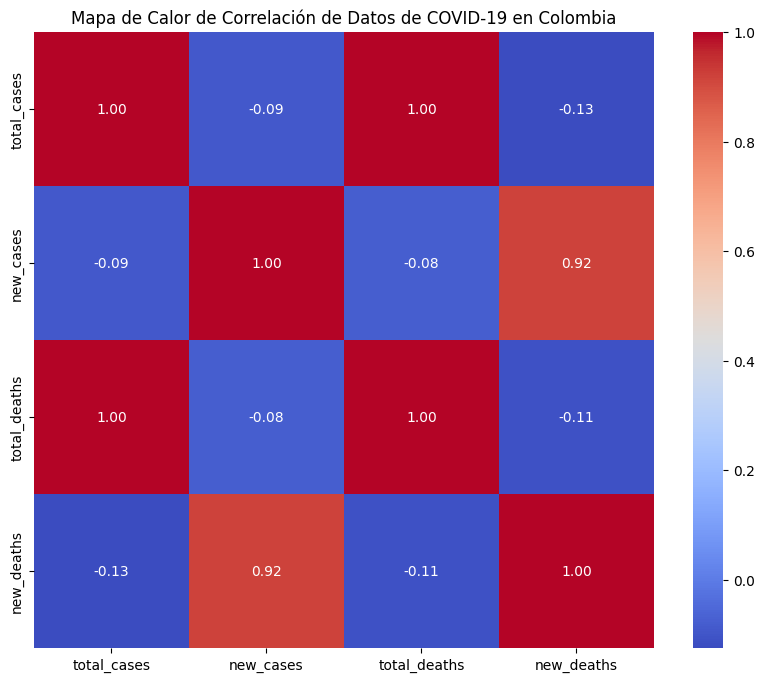

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Título del gráfico
plt.title('Mapa de Calor de Correlación de Datos de COVID-19 en Colombia')

# Mostrar el gráfico
plt.show()


0


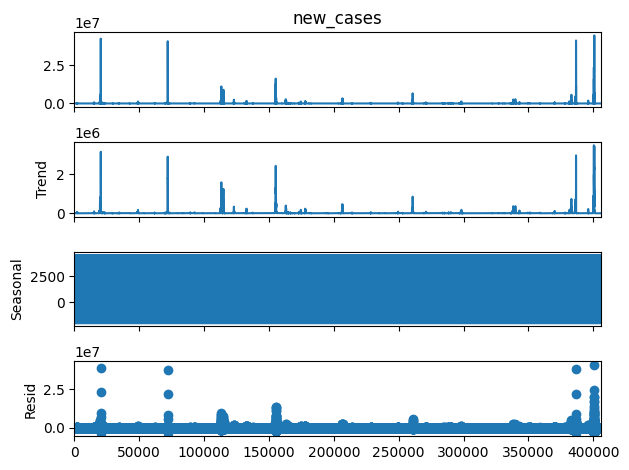

In [29]:
# Reemplazar valores NaN por cero
selected_columns['new_cases'].fillna(0, inplace=True)

# Verificar si aún hay valores faltantes
print(selected_columns['new_cases'].isnull().sum())

# Aplicar la descomposición después de la imputación
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(selected_columns['new_cases'], model='additive', period=30)
result.plot()
plt.show()


### Análisis de Tendencias
Una forma efectiva de analizar tendencias es a través de gráficos de series temporales y modelos de regresión para ver cómo evolucionan los casos y muertes a lo largo del tiempo.


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
#pip install statsmodels
# Descomposición de series temporales para 'new_cases'
result = seasonal_decompose(selected_columns['new_cases'], model='additive', period=30)  # Ajusta el período según la frecuencia de tus datos
result.plot()
plt.show()


ValueError: This function does not handle missing values

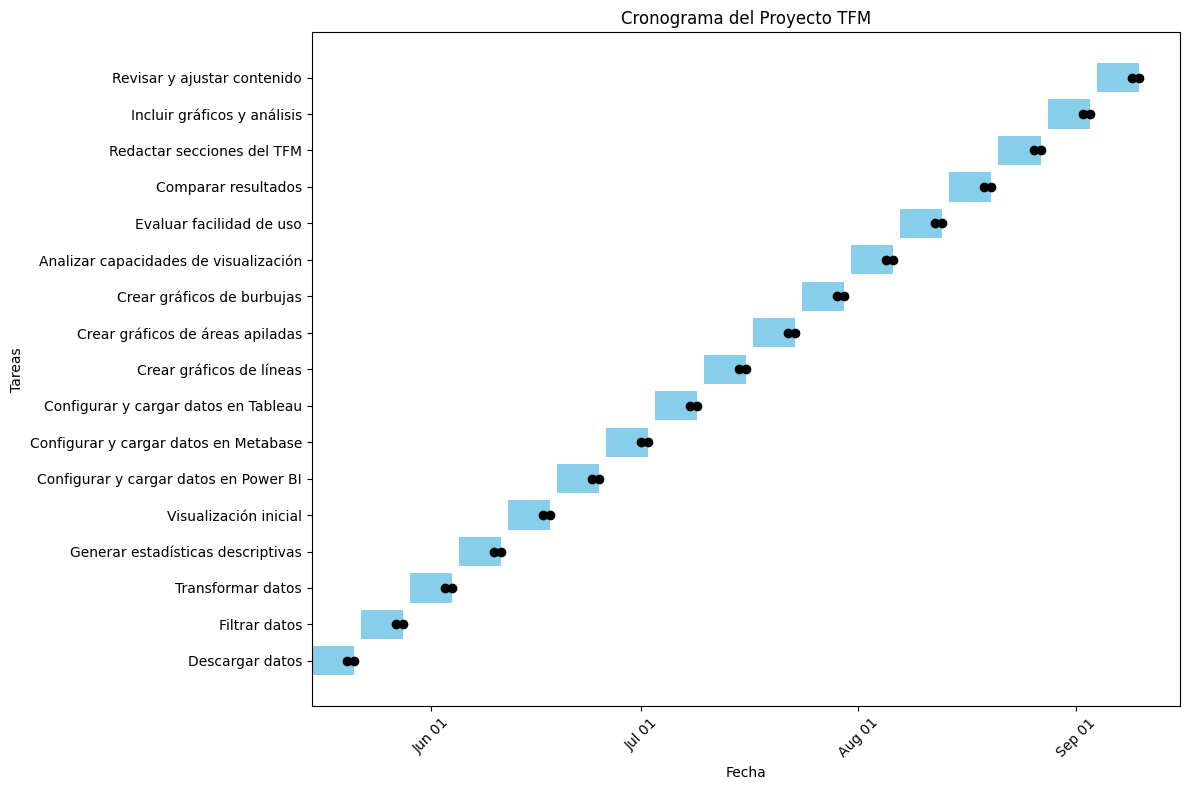

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import datetime

# Definir las tareas y sus fechas de inicio y fin
tasks = {
    "Task": [
        "Descargar datos",
        "Filtrar datos",
        "Transformar datos",
        "Generar estadísticas descriptivas",
        "Visualización inicial",
        "Configurar y cargar datos en Power BI",
        "Configurar y cargar datos en Metabase",
        "Configurar y cargar datos en Tableau",
        "Crear gráficos de líneas",
        "Crear gráficos de áreas apiladas",
        "Crear gráficos de burbujas",
        "Analizar capacidades de visualización",
        "Evaluar facilidad de uso",
        "Comparar resultados",
        "Redactar secciones del TFM",
        "Incluir gráficos y análisis",
        "Revisar y ajustar contenido"
    ],
    "Start": [
        "2024-05-15",
        "2024-05-22",
        "2024-05-29",
        "2024-06-05",
        "2024-06-12",
        "2024-06-19",
        "2024-06-26",
        "2024-07-03",
        "2024-07-10",
        "2024-07-17",
        "2024-07-24",
        "2024-07-31",
        "2024-08-07",
        "2024-08-14",
        "2024-08-21",
        "2024-08-28",
        "2024-09-04"
    ],
    "End": [
        "2024-05-21",
        "2024-05-28",
        "2024-06-04",
        "2024-06-11",
        "2024-06-18",
        "2024-06-25",
        "2024-07-02",
        "2024-07-09",
        "2024-07-16",
        "2024-07-23",
        "2024-07-30",
        "2024-08-06",
        "2024-08-13",
        "2024-08-20",
        "2024-08-27",
        "2024-09-03",
        "2024-09-10"
    ],
    "Review": [
        "2024-05-20",
        "2024-05-27",
        "2024-06-03",
        "2024-06-10",
        "2024-06-17",
        "2024-06-24",
        "2024-07-01",
        "2024-07-08",
        "2024-07-15",
        "2024-07-22",
        "2024-07-29",
        "2024-08-05",
        "2024-08-12",
        "2024-08-19",
        "2024-08-26",
        "2024-09-02",
        "2024-09-09"
    ],
    "Deploy": [
        "2024-05-21",
        "2024-05-28",
        "2024-06-04",
        "2024-06-11",
        "2024-06-18",
        "2024-06-25",
        "2024-07-02",
        "2024-07-09",
        "2024-07-16",
        "2024-07-23",
        "2024-07-30",
        "2024-08-06",
        "2024-08-13",
        "2024-08-20",
        "2024-08-27",
        "2024-09-03",
        "2024-09-10"
    ]
}

# Convertir las fechas a formato datetime
tasks_df = pd.DataFrame(tasks)
tasks_df["Start"] = pd.to_datetime(tasks_df["Start"])
tasks_df["End"] = pd.to_datetime(tasks_df["End"])
tasks_df["Review"] = pd.to_datetime(tasks_df["Review"])
tasks_df["Deploy"] = pd.to_datetime(tasks_df["Deploy"])

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de Gantt
for idx, row in tasks_df.iterrows():
    ax.barh(row["Task"], (row["End"] - row["Start"]).days, left=row["Start"], align="center", color='skyblue')
    ax.plot([row["Review"], row["Deploy"]], [row["Task"], row["Task"]], color='black', marker='o', linestyle='-')

# Formatear las fechas en el eje x
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

# Añadir etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Tareas')
ax.set_title('Cronograma del Proyecto TFM')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

plt.tight_layout()

# Guardar la figura en un archivo
#plt.savefig("/mnt/data/cronograma_proyecto_tfm.png")

plt.show()
